In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
who_Pop = pd.read_csv('../data/who_annual_pop.csv')
who_Pop.head()

,Country or Area,Year(s),Value,Value Footnotes
0,Afghanistan,2012,-2.4,NaN
1,Albania,2012,-0.3,NaN
2,Algeria,2012,-1.9,NaN
3,Andorra,2012,0.0,NaN
4,Angola,2012,-3.1,NaN


In [3]:
who_Pop = who_Pop.drop('Value Footnotes', axis = 1)

In [4]:
who_Pop.head()

,Country or Area,Year(s),Value
0,Afghanistan,2012,-2.4
1,Albania,2012,-0.3
2,Algeria,2012,-1.9
3,Andorra,2012,0.0
4,Angola,2012,-3.1


In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')

In [6]:
who_Pop_df = who_Pop.rename(columns = {'Country or Area' : 'Country','Year(s)' : 'Year','Value':'Pop Growth Rate' })
who_Pop_df.head()

,Country,Year,Pop Growth Rate
0,Afghanistan,2012,-2.4
1,Albania,2012,-0.3
2,Algeria,2012,-1.9
3,Andorra,2012,0.0
4,Angola,2012,-3.1


In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country','Value':'GDP_Per_Capita' })
gdp_df.head()

,Country,Year,GDP_Per_Capita,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [9]:
gdp_Pop = who_Pop_df.merge(gdp_df,on=['Country','Year'])
gdp_Pop.head()

,Country,Year,Pop Growth Rate,GDP_Per_Capita
0,Afghanistan,2012,-2.4,1772.764974
1,Albania,2012,-0.3,10369.561032
2,Algeria,2012,-1.9,13229.008711
3,Angola,2012,-3.1,6645.085625
4,Antigua and Barbuda,2012,-1.1,20283.897534


In [10]:
gdp_Pop.sort_values(['Pop Growth Rate','GDP_Per_Capita'],ascending=(False,False))

,Country,Year,Pop Growth Rate,GDP_Per_Capita
21,Bulgaria,2012,0.8,15772.079281
78,Latvia,2012,0.6,20864.819497
151,Ukraine,2012,0.6,8322.173034
83,Lithuania,2012,0.5,24018.818497
13,Belarus,2012,0.5,17472.324931
...,...,...,...,...
77,Kuwait,2012,-3.9,78700.458568
73,Jordan,2012,-4.0,8979.518860
133,South Sudan,2012,-4.3,1622.022720
119,Qatar,2012,-7.1,120366.280146


In [11]:
continents = pd.read_csv("../data/continents.csv")

In [12]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [13]:
gdp_Pop = gdp_Pop.merge(continents,on='Country')
gdp_Pop

,Country,Year,Pop Growth Rate,GDP_Per_Capita,Continent
0,Afghanistan,2012,-2.4,1772.764974,Asia
1,Albania,2012,-0.3,10369.561032,Europe
2,Algeria,2012,-1.9,13229.008711,Africa
3,Angola,2012,-3.1,6645.085625,Africa
4,Antigua and Barbuda,2012,-1.1,20283.897534,North America
...,...,...,...,...,...
155,Uzbekistan,2012,-1.4,5821.527954,Asia
156,Vanuatu,2012,-2.0,2875.761848,Oceania
157,Yemen,2012,-2.3,3861.116716,Asia
158,Zambia,2012,-3.2,3566.382521,Africa


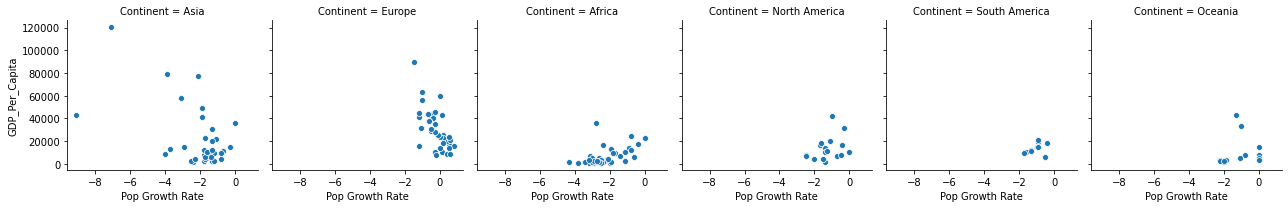

In [24]:
plt.figsize = (12,8)
g = sns.FacetGrid(gdp_Pop, col = "Continent" )
g.map_dataframe(sns.scatterplot, "Pop Growth Rate", 'GDP_Per_Capita')
plt.show()

In [26]:
gdp_Pop_Na = gdp_Pop[gdp_Pop['Continent']=='North America']
gdp_Pop_Asia = gdp_Pop[gdp_Pop['Continent']=='Asia']
gdp_Pop_Europe = gdp_Pop[gdp_Pop['Continent']=='Europe']
gdp_Pop_Africa = gdp_Pop[gdp_Pop['Continent']=='Africa']
gdp_Pop_Sa = gdp_Pop[gdp_Pop['Continent']=='South America']
gdp_Pop_Ocean = gdp_Pop[gdp_Pop['Continent']=='Oceanica']

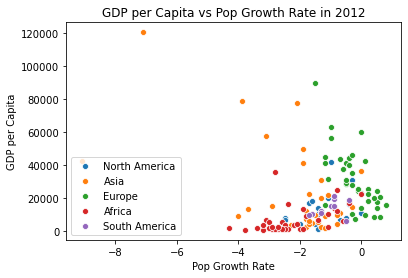

In [36]:
plt.figsize = (26,8)
sns.scatterplot(gdp_Pop_Na['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="North America")
sns.scatterplot(gdp_Pop_Asia['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Asia")
sns.scatterplot(gdp_Pop_Europe['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Europe")
sns.scatterplot(gdp_Pop_Africa['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Africa")
sns.scatterplot(gdp_Pop_Sa['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="South America")
sns.scatterplot(gdp_Pop_Ocean['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Oceanica")
plt.xlabel('Pop Growth Rate')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita vs Pop Growth Rate in 2012')
plt.legend(loc="lower left")